In [2]:
#mylist = !(ls | egrep .*.events )

In [3]:
testdirs = !(ls | egrep test ) # to get all dirs
mylist={}
for dir in testdirs :
    x = !(ls $dir |egrep .*.events )# each element of the list represent an implementat
    mylist[dir[11:]] = (dir,x)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def extractfile(name):
    """ return a dict which contains
    1- the timestamp of start
    2- time stamp of the end
    3- an array of timestamps of meusures
    4- an array of the mesures
    this function is based on the format of the file so anychanges of the structure of
    """
    with open(name) as f :
        x = [i.split(' ') for i in f.read().split('\n') ]
        tstart = int(x[1][1][1:]) *1000 # transform them into ms
        tend = int(x[2][1][1:]) *1000 #
        ind = x.index(["##--##"])+1
        times = [int(i[0][10:-1]) for i in x[ind:][0:-1:2]] ## we added -1 due to the l
        powers = [float(i[0][6:]) for i in x[ind:][1::2]]
        duration = (times[-1]- times[0])/1000
        energy = sum(powers) 
    return {'tstart' : tstart ,'tend': tend ,'times':times ,'powers':powers,'duration':duration,'energy':energy } 

KeyError: 'c_rec'

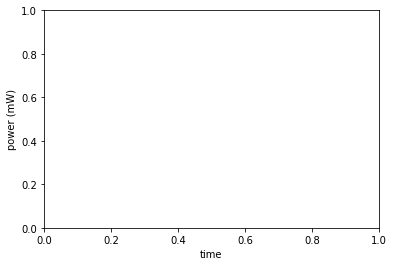

In [5]:
import matplotlib.pyplot as plt
plt.xlabel('time')
plt.ylabel('power (mW)')
tempdir,tempfile = mylist['c_rec']
x = extractfile(tempdir+'/'+tempfile[1])
print('duration %d energy %d mj' % (x['duration'],x['energy']))
plt.plot([i/1000 for i in x["times"]],x["powers"])
s=plt.xticks(rotation=45 ,ha='right')

In [ ]:
def energy_mesure(language):
    l=[]
    tempdir,templist = mylist[language]
    for tempfile in templist:
        x = extractfile(tempdir+'/'+tempfile)
        l.append(x['energy'])
    return np.mean(l) /1000

In [ ]:
curdir=!pwd
curdir=curdir[0].split('/')[-1] #to get the name of the current floder
curdir=curdir.split('.') # just the infos cause his name is bank.mintours/maxtours.nbit
mintours= curdir[-3]
maxtours=curdir[-2]
nbiterations=curdir[-1]

In [ ]:
plt.xlabel('programming languages')
plt.ylabel('energy ')
keys = list(mylist.keys())
values = [energy_mesure(x) for x in keys]
axes =plt.barh(keys , values)
for v in axes :
    plt.text(v.get_width() +1, v.get_y()+v.get_height()/2 ,'%.2f' %v.get_width())